<a href="https://colab.research.google.com/github/Sudo343/Foundations-of-ML-MA722/blob/main/drug%20decision%20tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision tree for drug dataset

In [18]:
install.packages("party")
library(party)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich



In [4]:
mydata = read.csv("/content/drug.csv", header = T, colClasses = "factor");

In [6]:
dim(mydata)

[1] 200   6

In [15]:
head(mydata)

,Age,Gender,BP,Cholesterol,SodiumPotassium,Drug
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,23,F,HIGH,HIGH,25.355,drugY
2,47,M,LOW,HIGH,13.093,drugC
3,47,M,LOW,HIGH,10.114,drugC
4,28,F,NORMAL,HIGH,7.798,drugX
5,61,F,LOW,HIGH,18.043,drugY
6,22,F,NORMAL,HIGH,8.607,drugX


we have only 200 observations. so let's do 70:30 split

In [13]:
pd <- sample(2, nrow( mydata), replace = T, prob = c( 0.7,0.3))


In [14]:
train_data = mydata[pd==1,]
test_data = mydata[pd==2,]

make tree using train data

In [44]:
# with age and gender
Dtree1 = ctree( Drug~Age+Gender+BP+Cholesterol+SodiumPotassium ,
                data = train_data)
# without age and gender
Dtree2 = ctree( Drug~ BP+Cholesterol+SodiumPotassium,
                data = train_data	)

In [20]:
Dtree1


	 Conditional inference tree with 4 terminal nodes

Response:  Drug 
Inputs:  Age, Gender, BP, Cholesterol, SodiumPotassium 
Number of observations:  135 

1) BP == {HIGH, LOW}; criterion = 1, statistic = 536
  2) BP == {HIGH}; criterion = 1, statistic = 368
    3)*  weights = 48 
  2) BP == {LOW}
    4) Cholesterol == {HIGH}; criterion = 1, statistic = 88
      5)*  weights = 21 
    4) Cholesterol == {NORMAL}
      6)*  weights = 24 
1) BP == {NORMAL}
  7)*  weights = 42 

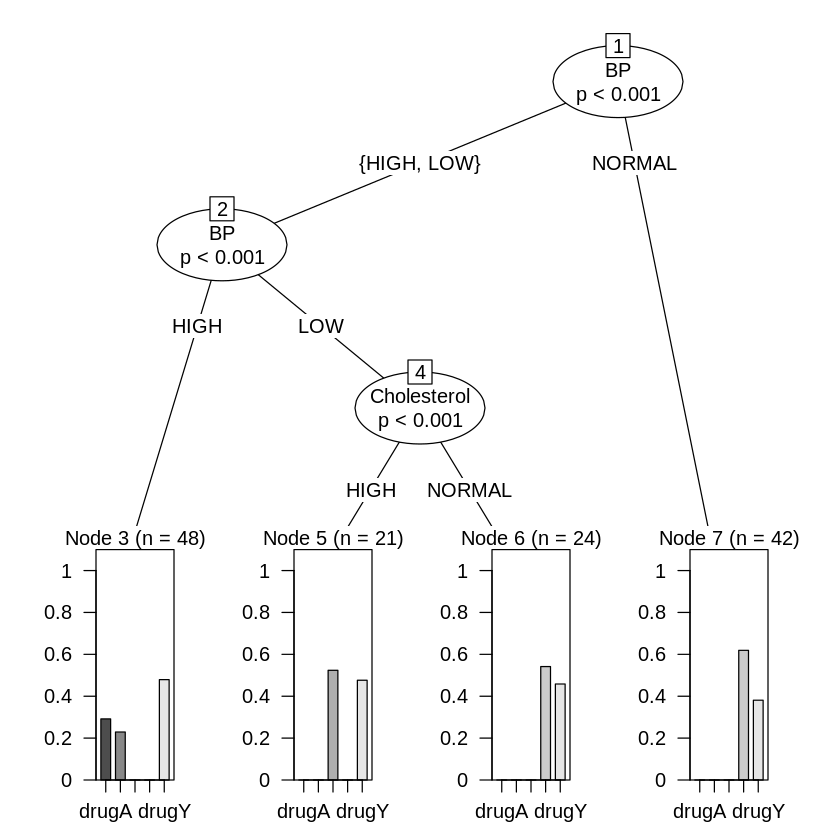

In [21]:
plot(Dtree1)

In [37]:
# for Dtree
predict(Dtree1,  test_data, type = "prob")
test_pred=predict(Dtree1, test_data)


[[1]]
[1] 0.0000000 0.0000000 0.5238095 0.0000000 0.4761905

[[2]]
[1] 0.0000000 0.0000000 0.5238095 0.0000000 0.4761905

[[3]]
[1] 0.0000000 0.0000000 0.0000000 0.6190476 0.3809524

[[4]]
[1] 0.0000000 0.0000000 0.0000000 0.6190476 0.3809524

[[5]]
[1] 0.0000000 0.0000000 0.0000000 0.6190476 0.3809524

[[6]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[7]]
[1] 0.0000000 0.0000000 0.0000000 0.6190476 0.3809524

[[8]]
[1] 0.0000000 0.0000000 0.5238095 0.0000000 0.4761905

[[9]]
[1] 0.0000000 0.0000000 0.5238095 0.0000000 0.4761905

[[10]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[11]]
[1] 0.0000000 0.0000000 0.0000000 0.6190476 0.3809524

[[12]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[13]]
[1] 0.0000000 0.0000000 0.0000000 0.6190476 0.3809524

[[14]]
[1] 0.0000000 0.0000000 0.0000000 0.6190476 0.3809524

[[15]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[16]]
[1] 0.0000000 0.0000000 0.0000000 0.6190476 0.3809524

[[17]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[18]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[19]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[20]]
[1] 0.0000000 0.0000000 0.0000000 0.5416667 0.4583333

[[21]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[22]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[23]]
[1] 0.0000000 0.0000000 0.0000000 0.6190476 0.3809524

[[24]]
[1] 0.0000000 0.0000000 0.0000000 0.6190476 0.3809524

[[25]]
[1] 0.0000000 0.0000000 0.0000000 0.5416667 0.4583333

[[26]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[27]]
[1] 0.0000000 0.0000000 0.0000000 0.6190476 0.3809524

[[28]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[29]]
[1] 0.0000000 0.0000000 0.0000000 0.5416667 0.4583333

[[30]]
[1] 0.0000000 0.0000000 0.5238095 0.0000000 0.4761905

[[31]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[32]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[33]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[34]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[35]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[36]]
[1] 0.0000000 0.0000000 0.0000000 0.6190476 0.3809524

[[37]]
[1] 0.0000000 0.0000000 0.0000000 0.6190476 0.3809524

[[38]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[39]]
[1] 0.0000000 0.0000000 0.0000000 0.6190476 0.3809524

[[40]]
[1] 0.0000000 0.0000000 0.0000000 0.5416667 0.4583333

[[41]]
[1] 0.0000000 0.0000000 0.0000000 0.5416667 0.4583333

[[42]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[43]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[44]]
[1] 0.0000000 0.0000000 0.5238095 0.0000000 0.4761905

[[45]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[46]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[47]]
[1] 0.0000000 0.0000000 0.0000000 0.6190476 0.3809524

[[48]]
[1] 0.0000000 0.0000000 0.0000000 0.5416667 0.4583333

[[49]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[50]]
[1] 0.0000000 0.0000000 0.5238095 0.0000000 0.4761905

[[51]]
[1] 0.0000000 0.0000000 0.0000000 0.5416667 0.4583333

[[52]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[53]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[54]]
[1] 0.0000000 0.0000000 0.0000000 0.5416667 0.4583333

[[55]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[56]]
[1] 0.0000000 0.0000000 0.0000000 0.6190476 0.3809524

[[57]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[58]]
[1] 0.0000000 0.0000000 0.0000000 0.6190476 0.3809524

[[59]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[60]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[61]]
[1] 0.0000000 0.0000000 0.5238095 0.0000000 0.4761905

[[62]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[63]]
[1] 0.0000000 0.0000000 0.5238095 0.0000000 0.4761905

[[64]]
[1] 0.0000000 0.0000000 0.5238095 0.0000000 0.4761905

[[65]]
[1] 0.0000000 0.0000000 0.0000000 

In [38]:
tab=table(predict(Dtree1), train_data$Drug)
print (tab)

       
        drugA drugB drugC drugX drugY
  drugA     0     0     0     0     0
  drugB     0     0     0     0     0
  drugC     0     0    11     0    10
  drugX     0     0     0    39    27
  drugY    14    11     0     0    23


In [39]:
#Accuracy of training data
sum(diag(tab)/sum(tab))
#misclassification error
1-sum(diag(tab)/sum(tab))

[1] 0.5407407

[1] 0.4592593

In [40]:
#accuracy of testing data
test_pred=predict(Dtree1, newdata=test_data)
tab=table(test_pred,test_data$Drug)
tab
sum(diag(tab)/sum(tab))
1-sum(diag(tab)/sum(tab))

         
test_pred drugA drugB drugC drugX drugY
    drugA     0     0     0     0     0
    drugB     0     0     0     0     0
    drugC     0     0     5     0     5
    drugX     0     0     0    15    11
    drugY     9     5     0     0    15

[1] 0.5384615

[1] 0.4615385

### Now test Dtree2

In [45]:
Dtree2


	 Conditional inference tree with 4 terminal nodes

Response:  Drug 
Inputs:  BP, Cholesterol, SodiumPotassium 
Number of observations:  135 

1) BP == {HIGH, LOW}; criterion = 1, statistic = 536
  2) BP == {HIGH}; criterion = 1, statistic = 368
    3)*  weights = 48 
  2) BP == {LOW}
    4) Cholesterol == {HIGH}; criterion = 1, statistic = 88
      5)*  weights = 21 
    4) Cholesterol == {NORMAL}
      6)*  weights = 24 
1) BP == {NORMAL}
  7)*  weights = 42 

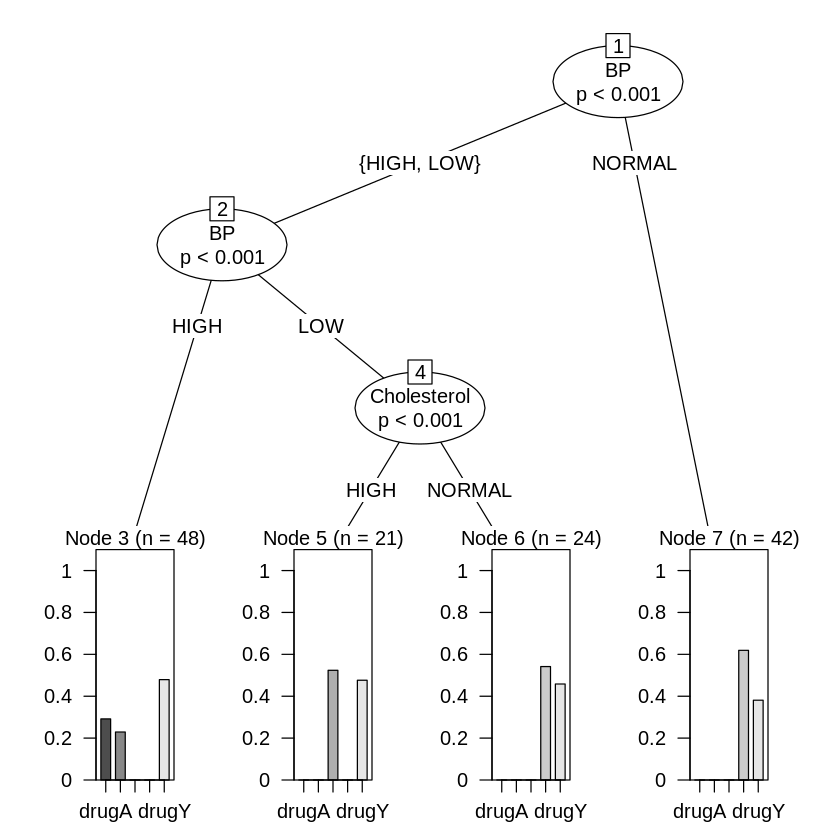

In [46]:
plot(Dtree2)

In [47]:
# for Dtree
predict(Dtree2,  test_data, type = "prob")
test_pred=predict(Dtree2, test_data)


[[1]]
[1] 0.0000000 0.0000000 0.5238095 0.0000000 0.4761905

[[2]]
[1] 0.0000000 0.0000000 0.5238095 0.0000000 0.4761905

[[3]]
[1] 0.0000000 0.0000000 0.0000000 0.6190476 0.3809524

[[4]]
[1] 0.0000000 0.0000000 0.0000000 0.6190476 0.3809524

[[5]]
[1] 0.0000000 0.0000000 0.0000000 0.6190476 0.3809524

[[6]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[7]]
[1] 0.0000000 0.0000000 0.0000000 0.6190476 0.3809524

[[8]]
[1] 0.0000000 0.0000000 0.5238095 0.0000000 0.4761905

[[9]]
[1] 0.0000000 0.0000000 0.5238095 0.0000000 0.4761905

[[10]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[11]]
[1] 0.0000000 0.0000000 0.0000000 0.6190476 0.3809524

[[12]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[13]]
[1] 0.0000000 0.0000000 0.0000000 0.6190476 0.3809524

[[14]]
[1] 0.0000000 0.0000000 0.0000000 0.6190476 0.3809524

[[15]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[16]]
[1] 0.0000000 0.0000000 0.0000000 0.6190476 0.3809524

[[17]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[18]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[19]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[20]]
[1] 0.0000000 0.0000000 0.0000000 0.5416667 0.4583333

[[21]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[22]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[23]]
[1] 0.0000000 0.0000000 0.0000000 0.6190476 0.3809524

[[24]]
[1] 0.0000000 0.0000000 0.0000000 0.6190476 0.3809524

[[25]]
[1] 0.0000000 0.0000000 0.0000000 0.5416667 0.4583333

[[26]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[27]]
[1] 0.0000000 0.0000000 0.0000000 0.6190476 0.3809524

[[28]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[29]]
[1] 0.0000000 0.0000000 0.0000000 0.5416667 0.4583333

[[30]]
[1] 0.0000000 0.0000000 0.5238095 0.0000000 0.4761905

[[31]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[32]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[33]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[34]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[35]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[36]]
[1] 0.0000000 0.0000000 0.0000000 0.6190476 0.3809524

[[37]]
[1] 0.0000000 0.0000000 0.0000000 0.6190476 0.3809524

[[38]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[39]]
[1] 0.0000000 0.0000000 0.0000000 0.6190476 0.3809524

[[40]]
[1] 0.0000000 0.0000000 0.0000000 0.5416667 0.4583333

[[41]]
[1] 0.0000000 0.0000000 0.0000000 0.5416667 0.4583333

[[42]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[43]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[44]]
[1] 0.0000000 0.0000000 0.5238095 0.0000000 0.4761905

[[45]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[46]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[47]]
[1] 0.0000000 0.0000000 0.0000000 0.6190476 0.3809524

[[48]]
[1] 0.0000000 0.0000000 0.0000000 0.5416667 0.4583333

[[49]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[50]]
[1] 0.0000000 0.0000000 0.5238095 0.0000000 0.4761905

[[51]]
[1] 0.0000000 0.0000000 0.0000000 0.5416667 0.4583333

[[52]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[53]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[54]]
[1] 0.0000000 0.0000000 0.0000000 0.5416667 0.4583333

[[55]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[56]]
[1] 0.0000000 0.0000000 0.0000000 0.6190476 0.3809524

[[57]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[58]]
[1] 0.0000000 0.0000000 0.0000000 0.6190476 0.3809524

[[59]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[60]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[61]]
[1] 0.0000000 0.0000000 0.5238095 0.0000000 0.4761905

[[62]]
[1] 0.2916667 0.2291667 0.0000000 0.0000000 0.4791667

[[63]]
[1] 0.0000000 0.0000000 0.5238095 0.0000000 0.4761905

[[64]]
[1] 0.0000000 0.0000000 0.5238095 0.0000000 0.4761905

[[65]]
[1] 0.0000000 0.0000000 0.0000000 

In [48]:
tab=table(predict(Dtree2), train_data$Drug)
print (tab)

       
        drugA drugB drugC drugX drugY
  drugA     0     0     0     0     0
  drugB     0     0     0     0     0
  drugC     0     0    11     0    10
  drugX     0     0     0    39    27
  drugY    14    11     0     0    23


In [49]:
#Accuracy of training data
sum(diag(tab)/sum(tab))
#misclassification error
1-sum(diag(tab)/sum(tab))

[1] 0.5407407

[1] 0.4592593

In [50]:
#accuracy of testing data
test_pred=predict(Dtree2, newdata=test_data)
tab=table(test_pred,test_data$Drug)
tab
sum(diag(tab)/sum(tab))
1-sum(diag(tab)/sum(tab))

         
test_pred drugA drugB drugC drugX drugY
    drugA     0     0     0     0     0
    drugB     0     0     0     0     0
    drugC     0     0     5     0     5
    drugX     0     0     0    15    11
    drugY     9     5     0     0    15

[1] 0.5384615

[1] 0.4615385

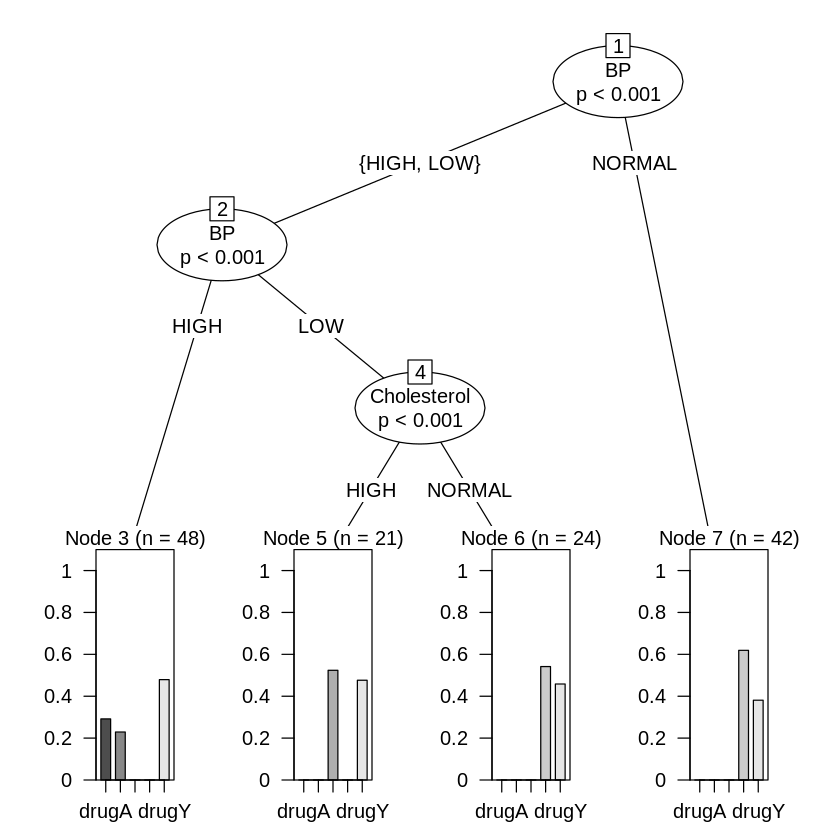

In [51]:
plot(Dtree1)

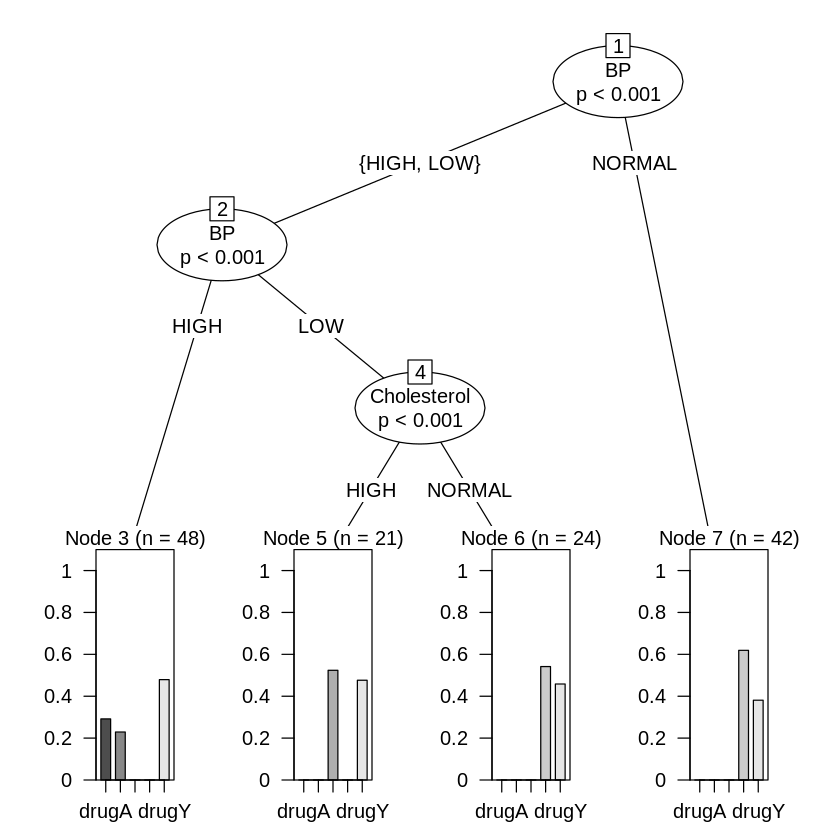

In [52]:
plot(Dtree2)